In [3]:
!pip install tensorflow

     |████████████████████████████████| 479.6 MB 26 kB/s  eta 0:00:01   |                                | 1.4 MB 2.0 MB/s eta 0:04:01     |██████▎                         | 94.3 MB 414 kB/s eta 0:15:31     |█████████▍                      | 141.1 MB 810 kB/s eta 0:06:58     |███████████▋                    | 174.3 MB 5.6 MB/s eta 0:00:55     |██████████████▍                 | 215.6 MB 1.2 MB/s eta 0:03:40     |█████████████████▌              | 262.3 MB 1.7 MB/s eta 0:02:11     |██████████████████▋             | 279.4 MB 234 kB/s eta 0:14:15     |████████████████████▉           | 312.2 MB 500 kB/s eta 0:05:35     |██████████████████████▌         | 336.8 MB 165 kB/s eta 0:14:22     |██████████████████████████      | 388.7 MB 248 kB/s eta 0:06:06     |█████████████████████████████▎  | 438.1 MB 128 kB/s eta 0:05:23
     |████████████████████████████████| 81 kB 415 kB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 5

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 


tf.get_logger().setLevel('WARNING')

2023-10-19 21:19:31.955788: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 21:19:32.020253: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 21:19:32.021101: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 21:19:33.344230: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 1169s 7us/step


In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


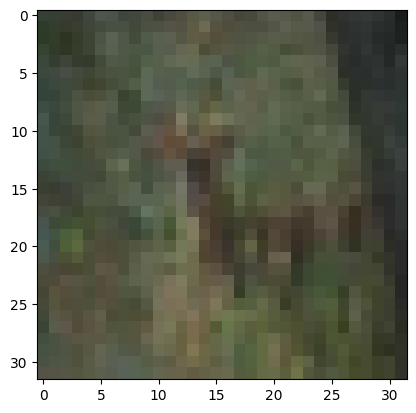

In [8]:
# Escolhendo uma imagem para plotar
sample = 10
image = x_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [9]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

In [11]:
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [12]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

In [14]:
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [15]:
#analisando as dim 
x_treino.shape

(40000, 32, 32, 3)

In [16]:
rede_simples = Sequential()

rede_simples.add(Flatten())
rede_simples.add(Dense(25,  input_dim = 1024))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))

In [17]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])
#### 6. Treinamento

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 100, 
                             verbose = 0,
                             validation_data = (x_val, y_val))

2023-10-19 21:45:07.706330: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2023-10-19 21:45:15.161486: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


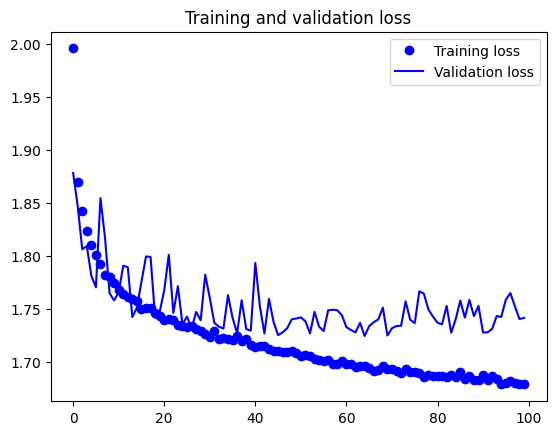

In [18]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()